In [1]:
import pandas as pd

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
data = pd.read_csv('decathlon.txt', sep='\t')

In [7]:
data.head()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar


In [10]:
my_data = data.drop(['Rank','Points','Competition'], axis=1)

In [11]:
X = my_data.values

In [12]:
X

array([[ 11.04,   7.58,  14.83,   2.07,  49.81,  14.69,  43.75,   5.02,
         63.19, 291.7 ],
       [ 10.76,   7.4 ,  14.26,   1.86,  49.37,  14.05,  50.72,   4.92,
         60.15, 301.5 ],
       [ 11.02,   7.3 ,  14.77,   2.04,  48.37,  14.09,  48.95,   4.92,
         50.31, 300.2 ],
       [ 11.02,   7.23,  14.25,   1.92,  48.93,  14.99,  40.87,   5.32,
         62.77, 280.1 ],
       [ 11.34,   7.09,  15.19,   2.1 ,  50.42,  15.31,  46.26,   4.72,
         63.44, 276.4 ],
       [ 11.11,   7.6 ,  14.31,   1.98,  48.68,  14.23,  41.1 ,   4.92,
         51.77, 278.1 ],
       [ 11.13,   7.3 ,  13.48,   2.01,  48.62,  14.17,  45.67,   4.42,
         55.37, 268.  ],
       [ 10.83,   7.31,  13.76,   2.13,  49.91,  14.38,  44.41,   4.42,
         56.37, 285.1 ],
       [ 11.64,   6.81,  14.57,   1.95,  50.14,  14.93,  47.6 ,   4.92,
         52.33, 262.1 ],
       [ 11.37,   7.56,  14.41,   1.86,  51.1 ,  15.06,  44.99,   4.82,
         57.19, 285.1 ],
       [ 11.33,   6.97,  14.09

In [13]:
X.shape

(41, 10)

In [14]:
from sklearn import preprocessing 

In [16]:
std_scale = preprocessing.StandardScaler().fit(X)

In [17]:
X_scaled = std_scale.transform(X)

In [18]:
from sklearn import decomposition   

In [37]:
pca = decomposition.PCA(n_components=2)

In [38]:
pca.fit(X_scaled)

PCA(n_components=2)

In [39]:
print (pca.explained_variance_ratio_)

[0.32719055 0.1737131 ]


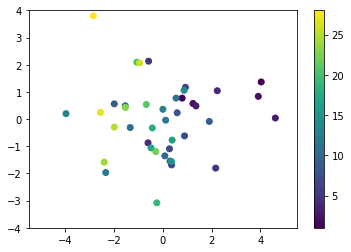

In [40]:
# projeter X sur les composantes principales
X_projected = pca.transform(X_scaled)

# afficher chaque observation
plt.scatter(X_projected[:, 0], X_projected[:, 1],
    # colorer en utilisant la variable 'Rank'
    c=data.get('Rank'))

plt.xlim([-5.5, 5.5])
plt.ylim([-4, 4])
plt.colorbar()

(-0.7, 0.7)

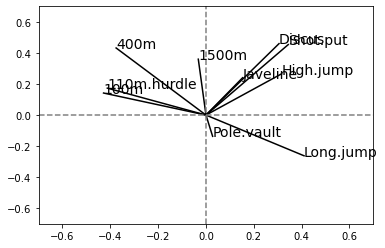

In [41]:
pcs = pca.components_

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, data.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

In [42]:
pca.components_

array([[-0.42829627,  0.41015201,  0.34414444,  0.31619436, -0.3757157 ,
        -0.41255442,  0.30542571,  0.02783081,  0.15319802, -0.03210733],
       [ 0.14198909, -0.26207936,  0.45394697,  0.2657761 ,  0.432046  ,
         0.17359096,  0.4600244 , -0.13684105,  0.24050715,  0.35980486]])

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn import (manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection)
from matplotlib import offsetbox

In [44]:
olivetti = fetch_olivetti_faces()
targets = olivetti.target
data = olivetti.data
images = olivetti.images

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Haytam\scikit_learn_data


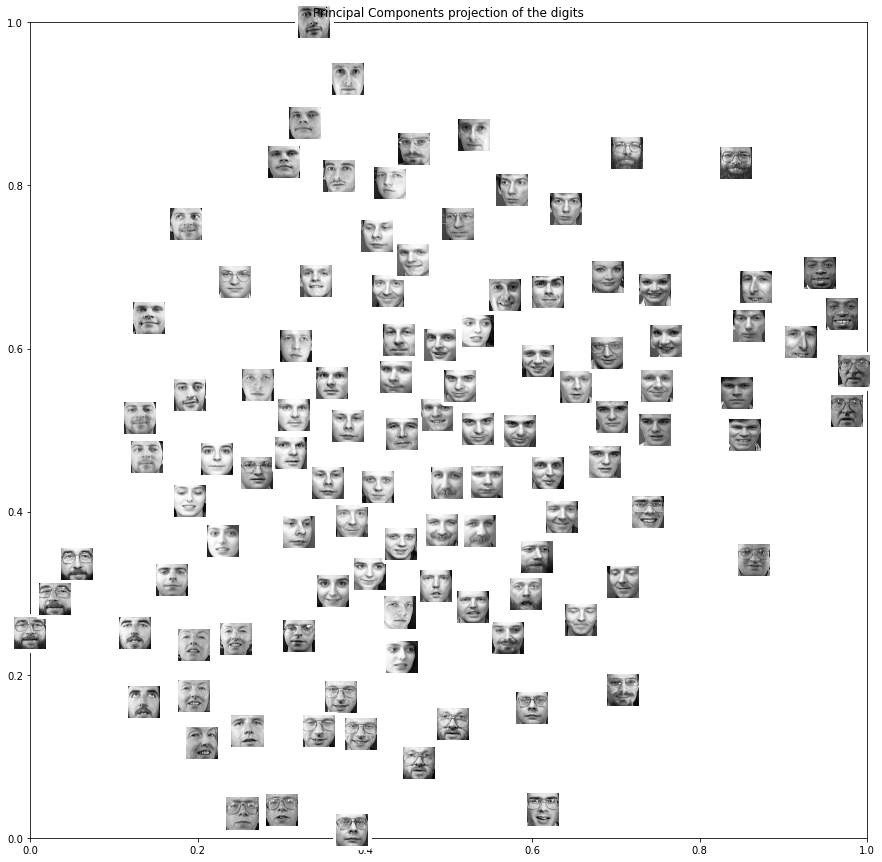

In [45]:

# fonction pour afficher une partie des images sur la visualisation 2D
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(15, 15))
    ax = plt.subplot(111)

    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([[1., 1.]])
        for i in range(data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 2e-3:
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            props={ 'boxstyle':'round', 'edgecolor':'white'}
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap=plt.cm.gray, zoom=0.5), X[i], bboxprops=props)
            ax.add_artist(imagebox)
    if title is not None:
        plt.title(title)
        
        
X = data
tsne = manifold.TSNE(n_components=2, perplexity=40, n_iter=3000, init='pca')
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne, "Principal Components projection of the digits")
plt.show()